# Support Vector Regression

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [295]:
df = pd.read_csv('dataset.csv')
df = df[df['Position'] != 'Goalkeeper']
df = df.drop('index', axis = 1)
df = df.drop('Minutes', axis = 1)
df

,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,Shots,...,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,League,Value
0,Randal Kolo Muani,23,32,31,15.0,11.0,2.0,6.0,1.0,75,...,19.0,3,17.0,13.0,0.0,Eintracht Frankfurt,Attack,France,Bundesliga,64000000.0
1,Bukayo Saka,20,38,37,14.0,11.0,2.0,6.0,0.0,86,...,38.0,14,77.0,19.0,0.0,Arsenal FC,Attack,England,Premier League,55000000.0
2,Victor Osimhen,23,32,30,26.0,4.0,2.0,4.0,0.0,132,...,6.0,6,16.0,29.0,0.0,SSC Napoli,Attack,Nigeria,Serie A,55000000.0
3,Vinicius Junior,22,33,32,10.0,9.0,0.0,10.0,1.0,77,...,24.0,6,36.0,1.0,0.0,Real Madrid,Attack,Brazil,La Liga,50000000.0
4,Alejandro Balde,18,33,30,1.0,6.0,0.0,4.0,0.0,19,...,25.0,12,54.0,17.0,1.0,FC Barcelona,Defender,Spain,La Liga,46000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,Carlos Soler,25,3,3,1.0,0.0,1.0,0.0,0.0,4,...,1.0,0,2.0,2.0,0.0,Paris Saint-Germain,midfield,Spain,Ligue 1,-25000000.0
1553,Arnaut Danjuma,25,10,6,2.0,0.0,1.0,0.0,0.0,11,...,0.0,0,3.0,1.0,1.0,Tottenham Hotspur,Attack,Netherlands,Premier League,-25000000.0
1554,Jadon Sancho,22,26,21,6.0,3.0,0.0,0.0,0.0,21,...,25.0,7,23.0,6.0,0.0,Manchester United,Attack,England,Premier League,-30000000.0
1555,Romelu Lukaku,29,25,19,10.0,6.0,2.0,1.0,0.0,49,...,3.0,0,3.0,16.0,0.0,Inter Milan,Attack,Belgium,Serie A,-30000000.0


# Attackers

In [296]:
attacker = df[df['Position'] == 'Attack']
attacker.head()

,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,Shots,...,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,League,Value
0,Randal Kolo Muani,23,32,31,15.0,11.0,2.0,6.0,1.0,75,...,19.0,3,17.0,13.0,0.0,Eintracht Frankfurt,Attack,France,Bundesliga,64000000.0
1,Bukayo Saka,20,38,37,14.0,11.0,2.0,6.0,0.0,86,...,38.0,14,77.0,19.0,0.0,Arsenal FC,Attack,England,Premier League,55000000.0
2,Victor Osimhen,23,32,30,26.0,4.0,2.0,4.0,0.0,132,...,6.0,6,16.0,29.0,0.0,SSC Napoli,Attack,Nigeria,Serie A,55000000.0
3,Vinicius Junior,22,33,32,10.0,9.0,0.0,10.0,1.0,77,...,24.0,6,36.0,1.0,0.0,Real Madrid,Attack,Brazil,La Liga,50000000.0
7,Rodrygo,21,34,25,9.0,8.0,1.0,4.0,0.0,97,...,23.0,8,25.0,5.0,0.0,Real Madrid,Attack,Brazil,La Liga,40000000.0


In [297]:
attacker.columns

Index(['Player', 'Age', 'Matches Played', 'Start', 'Goals', 'Assists',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'League', 'Value'],
      dtype='object')

In [298]:
X = attacker.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
y = attacker['Value']

In [299]:
X.dtypes

Age                           int64
Matches Played                int64
Start                         int64
Goals                       float64
Assists                     float64
Penalties Made              float64
Shots                         int64
Shots On Target               int64
Shots On Target %           float64
Goals Per Shot              float64
Goals Per Shot On Target    float64
Average Shot Distance       float64
Shots From Freekicks        float64
Goal-Creating Actions       float64
dtype: object

# Model Training

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [301]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [302]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

SVR()

In [303]:
cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

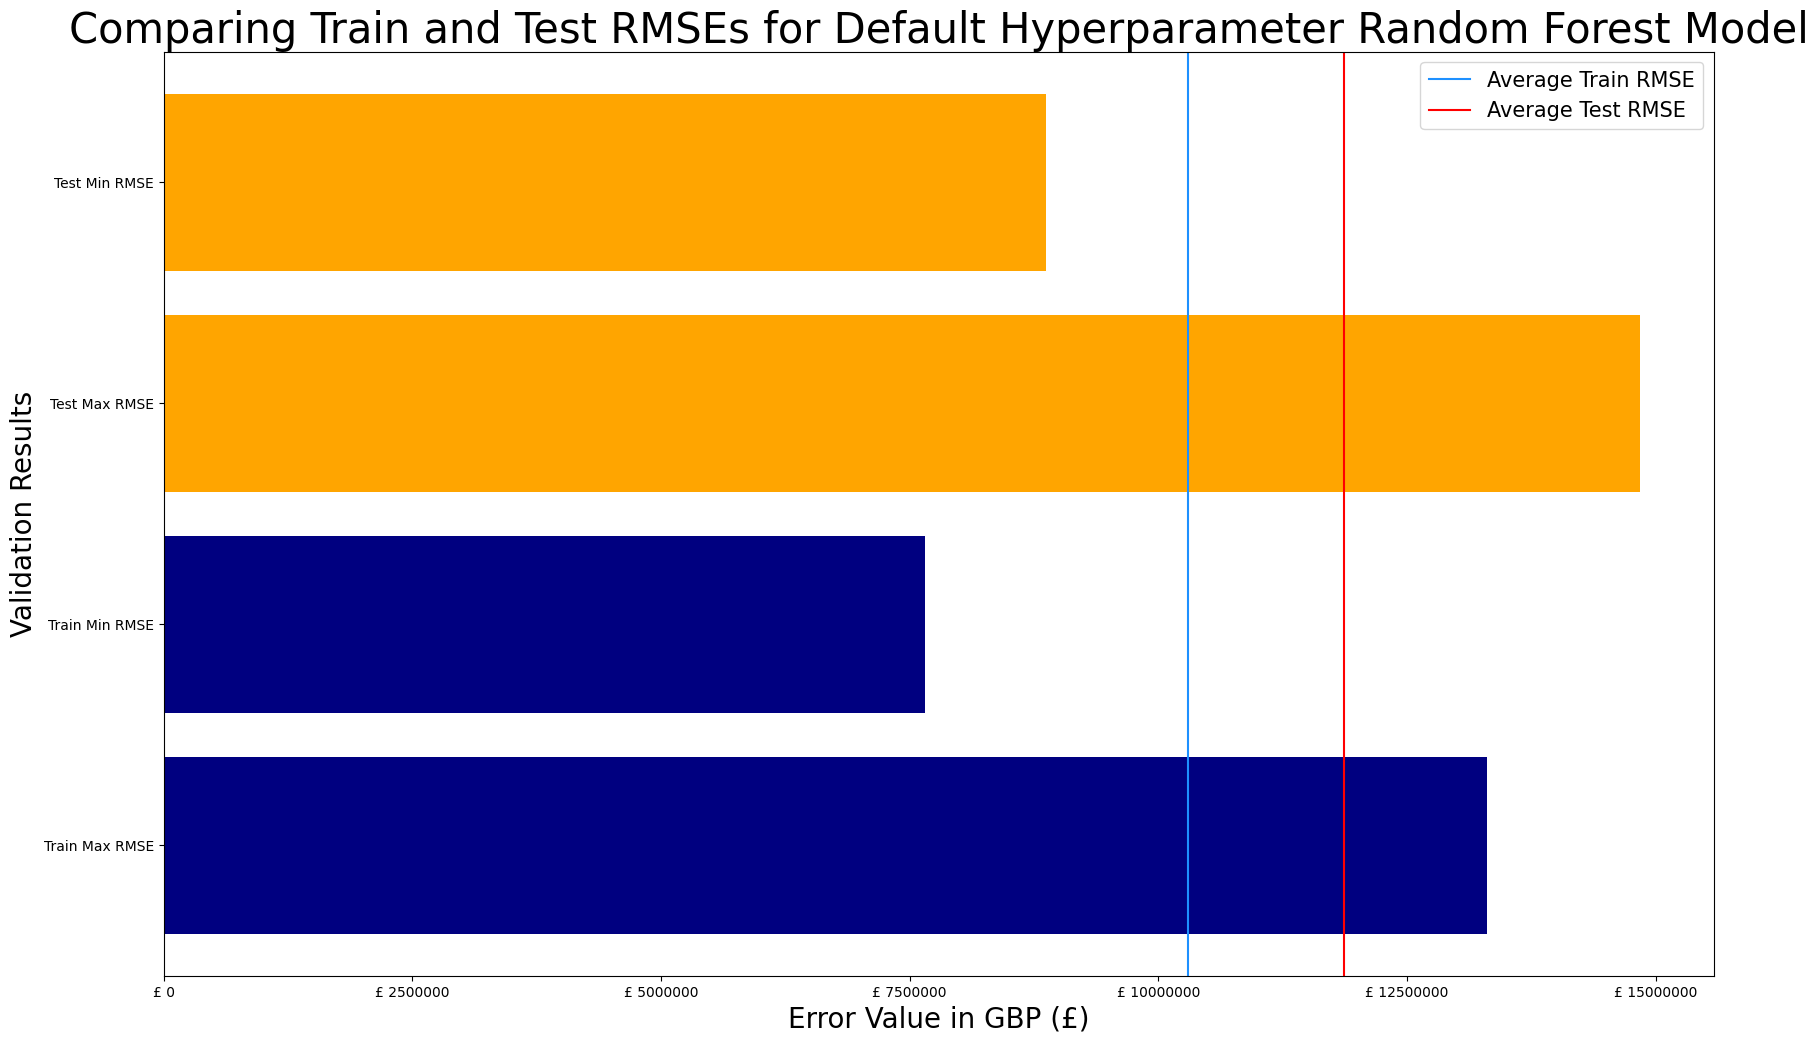

In [304]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [305]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,10300884.91,13299233.63,7653616.18
1,Test,11870463.39,14838511.56,8873272.76


In [306]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -8.208346842630831e-05
Test R-squared: -0.013835019286173367
Train Adjusted R-squared: -0.049731548605156606
Test Adjusted R-squared: -0.18280752250053567


In [307]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Variable        VIF
0                        Age  20.822507
1             Matches Played  27.920000
2                      Start  18.284432
3                      Goals  32.611421
4                    Assists   8.327668
5             Penalties Made   3.566687
6                      Shots  69.679459
7            Shots On Target  74.931448
8          Shots On Target %  18.148572
9             Goals Per Shot  24.965827
10  Goals Per Shot On Target  16.575986
11     Average Shot Distance  19.819202
12      Shots From Freekicks   1.728798
13     Goal-Creating Actions  13.931633


<Axes: >

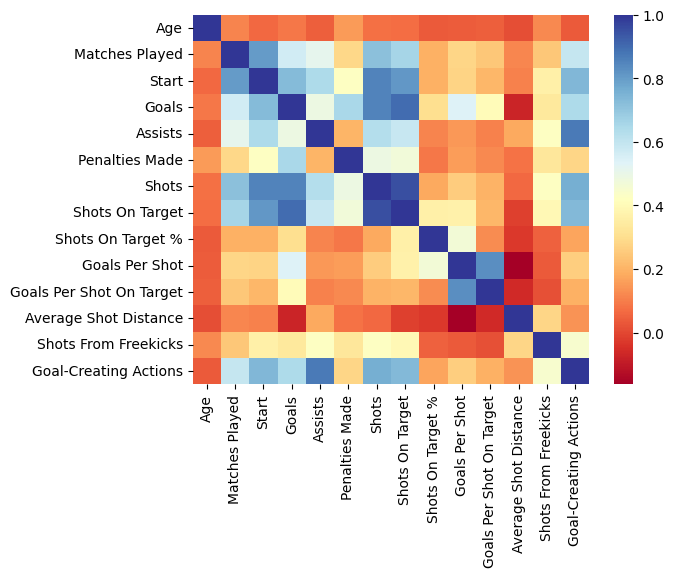

In [308]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = False, cmap='RdYlBu')

In [309]:
X = X.drop(['Matches Played', 'Start', 'Shots', 'Shots On Target', 'Penalties Made', 'Goals Per Shot On Target'], axis=1)

In [310]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                Variable        VIF
0                    Age  17.991304
1                  Goals   4.632294
2                Assists   8.194445
3      Shots On Target %  10.040151
4         Goals Per Shot   5.099001
5  Average Shot Distance  16.399129
6   Shots From Freekicks   1.563046
7  Goal-Creating Actions  12.236242


In [311]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [312]:
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [313]:
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [314]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

SVR()

In [315]:
cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

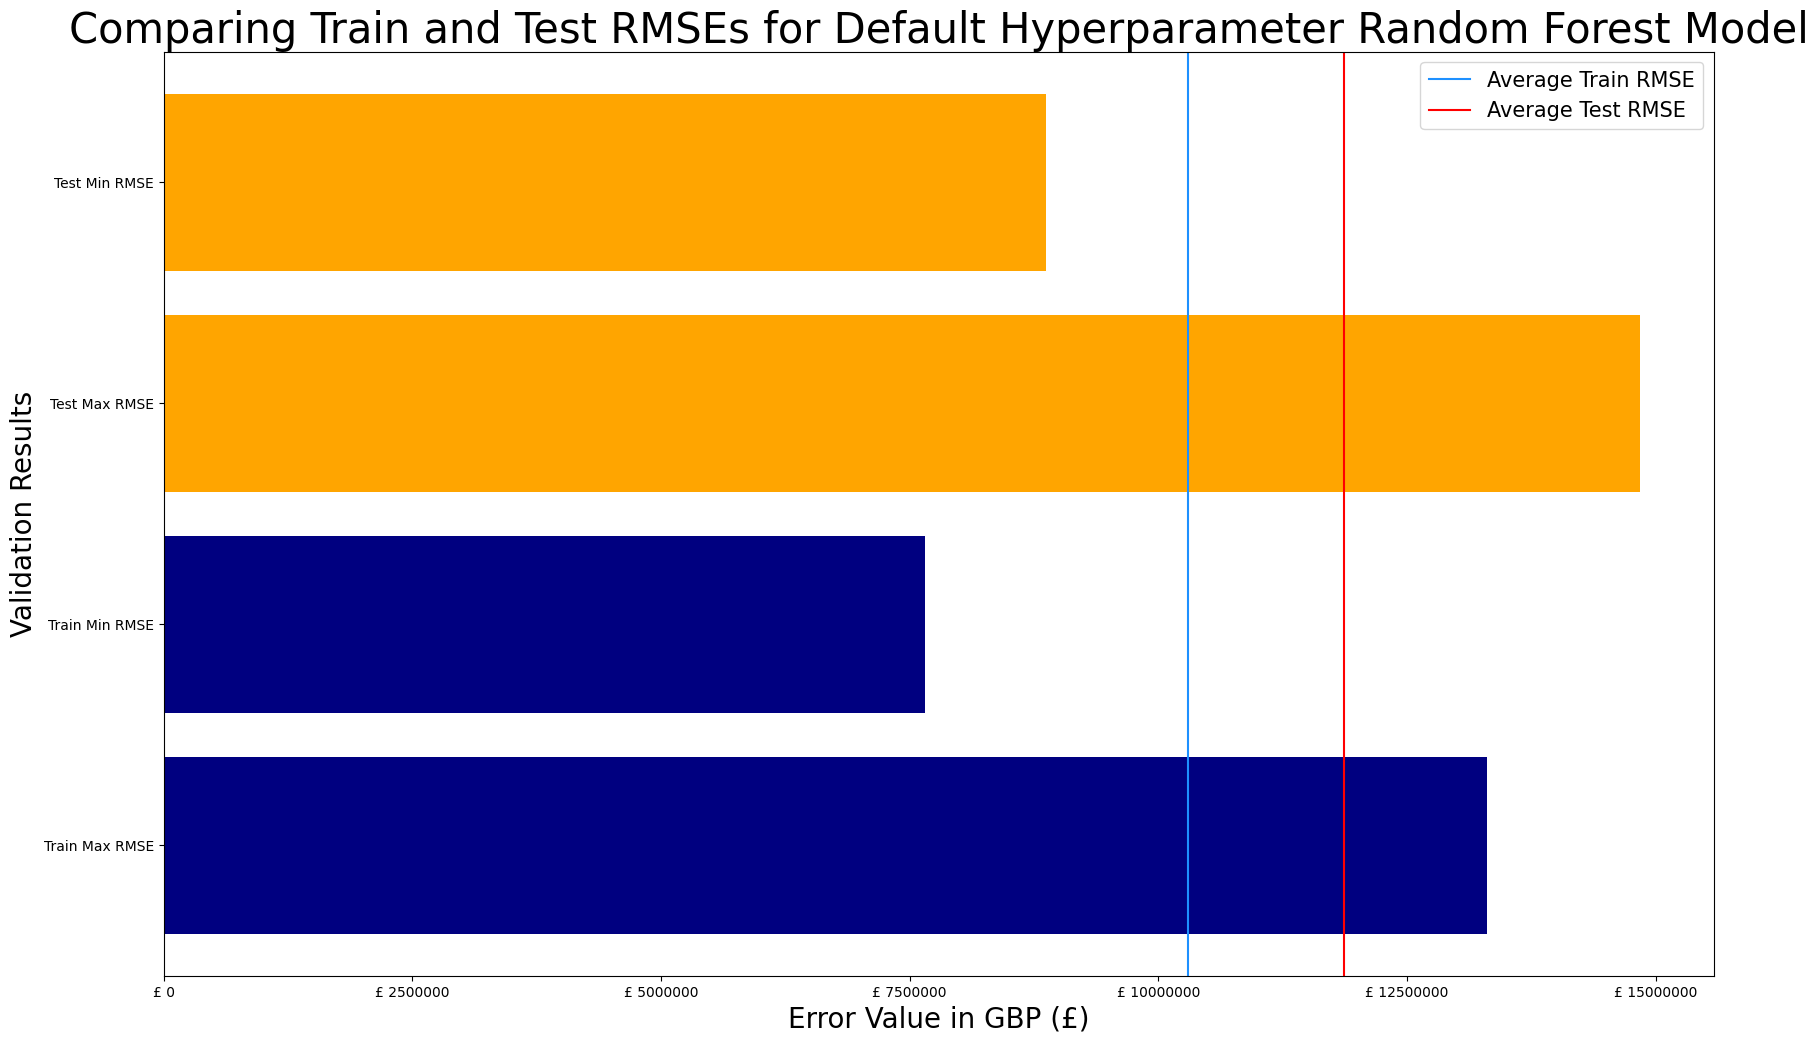

In [316]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [317]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,10300884.54,13299233.10,7653616.54
1,Test,11870463.59,14838512.59,8873272.95


In [318]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -8.19760866439534e-05
Test R-squared: -0.013834949222204296
Train Adjusted R-squared: -0.0278620309779396
Test Adjusted R-squared: -0.10395361137528902


# Tuning

In [319]:
parameters = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [320]:
grid_search = GridSearchCV(estimator = svr, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [321]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1,

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [322]:
grid_search.best_params_

{'C': 1000, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [323]:
param_values = list((grid_search.best_params_).values())
param_values

[1000, 3, 1, 'poly']

In [324]:
svr_Grid = SVR(C = param_values[0],
              degree = param_values[1],
              gamma = param_values[2],
              kernel=param_values[3])

svr_Grid.fit(X_train,y_train)

SVR(C=1000, gamma=1, kernel='poly')

In [325]:
cross_val_train = cross_val_score(svr_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

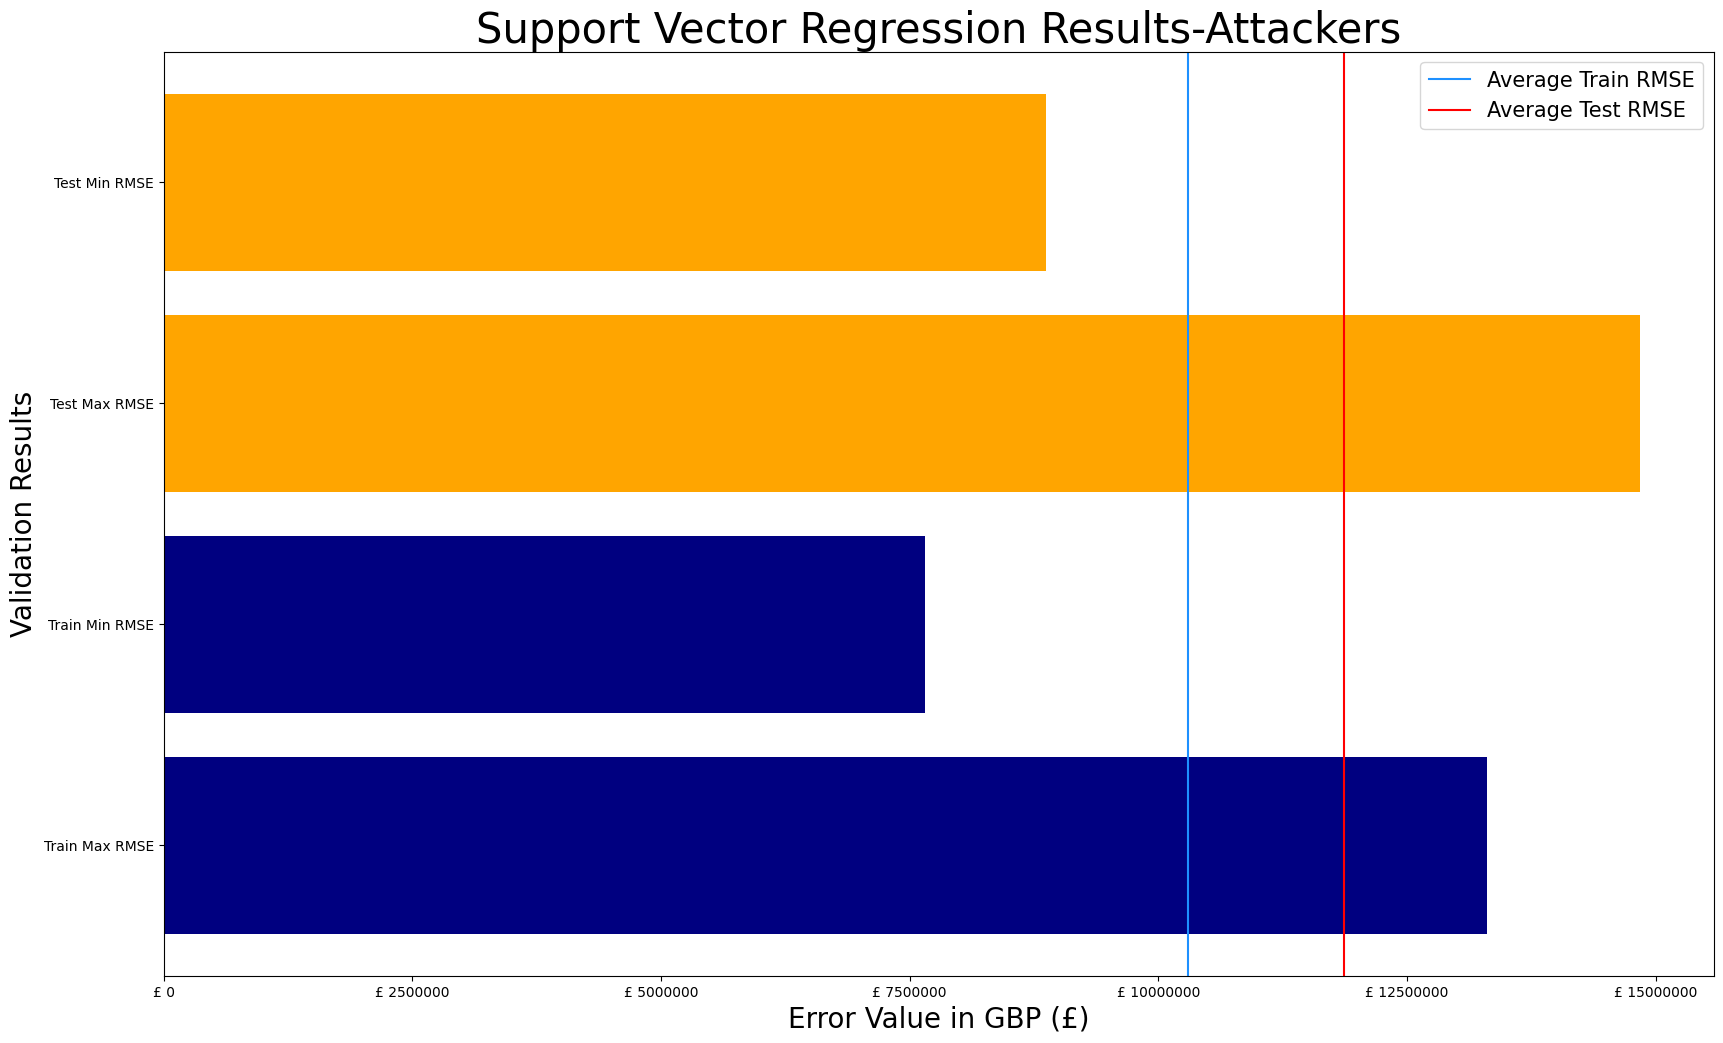

In [326]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Support Vector Regression Results-Attackers',fontsize=30)
ax.legend(fontsize=15)

In [327]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,9870198.44,12653400.40,7610673.57
1,Test,10662392.84,13018492.71,6713187.16


In [328]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr_Grid.predict(X_train)
y_test_pred = svr_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.14205347184805306
Test R-squared: 0.19153083919640024
Train Adjusted R-squared: 0.11822162384383239
Test Adjusted R-squared: 0.11966691379163585


# Midfielders

In [329]:
midfielder = df[df['Position'] == 'midfield']
midfielder.head()

,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,Shots,...,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,League,Value
5,Jamal Musiala,19,33,26,12.0,10.0,0.0,1.0,0.0,66,...,30.0,19,53.0,3.0,0.0,Bayern Munich,midfield,Germany,Bundesliga,45000000.0
6,Martin Odegaard,23,37,37,15.0,7.0,0.0,4.0,0.0,93,...,20.0,6,42.0,12.0,1.0,Arsenal FC,midfield,Norway,Premier League,45000000.0
8,Jude Bellingham,19,31,30,8.0,4.0,1.0,8.0,0.0,66,...,51.0,35,111.0,30.0,0.0,Borussia Dortmund,midfield,England,Bundesliga,40000000.0
12,Amadou Onana,20,33,29,1.0,2.0,0.0,9.0,0.0,34,...,25.0,37,109.0,39.0,0.0,Everton FC,midfield,Belgium,Premier League,35000000.0
13,Gavi,17,36,30,2.0,4.0,0.0,10.0,0.0,28,...,32.0,18,65.0,22.0,0.0,FC Barcelona,midfield,Spain,La Liga,30000000.0


In [330]:
midfielder.columns

Index(['Player', 'Age', 'Matches Played', 'Start', 'Goals', 'Assists',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'League', 'Value'],
      dtype='object')

In [331]:
X = midfielder.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position','Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance', 
        'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
y = midfielder['Value']

In [332]:
X.dtypes

Age                               int64
Matches Played                    int64
Start                             int64
Goals                           float64
Assists                         float64
Penalties Made                  float64
Shots From Freekicks            float64
Passes Completed                float64
Passes                          float64
Pass Completion %               float64
Total Passing Distance          float64
Progressive Passing Distance    float64
Shot-Creating Actions           float64
Shot-Creating Actions/90        float64
SCA Pass Live                   float64
SCA Pass Dead                   float64
SCA Take-ons                    float64
SCA Shots                       float64
SCA Fouls                       float64
SCA Defense                     float64
Goal-Creating Actions           float64
Goal-Creating Actions/90        float64
Goal Pass Live                  float64
Goal Pass Dead                  float64
Goal Take-ons                   float64


# Model Training

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

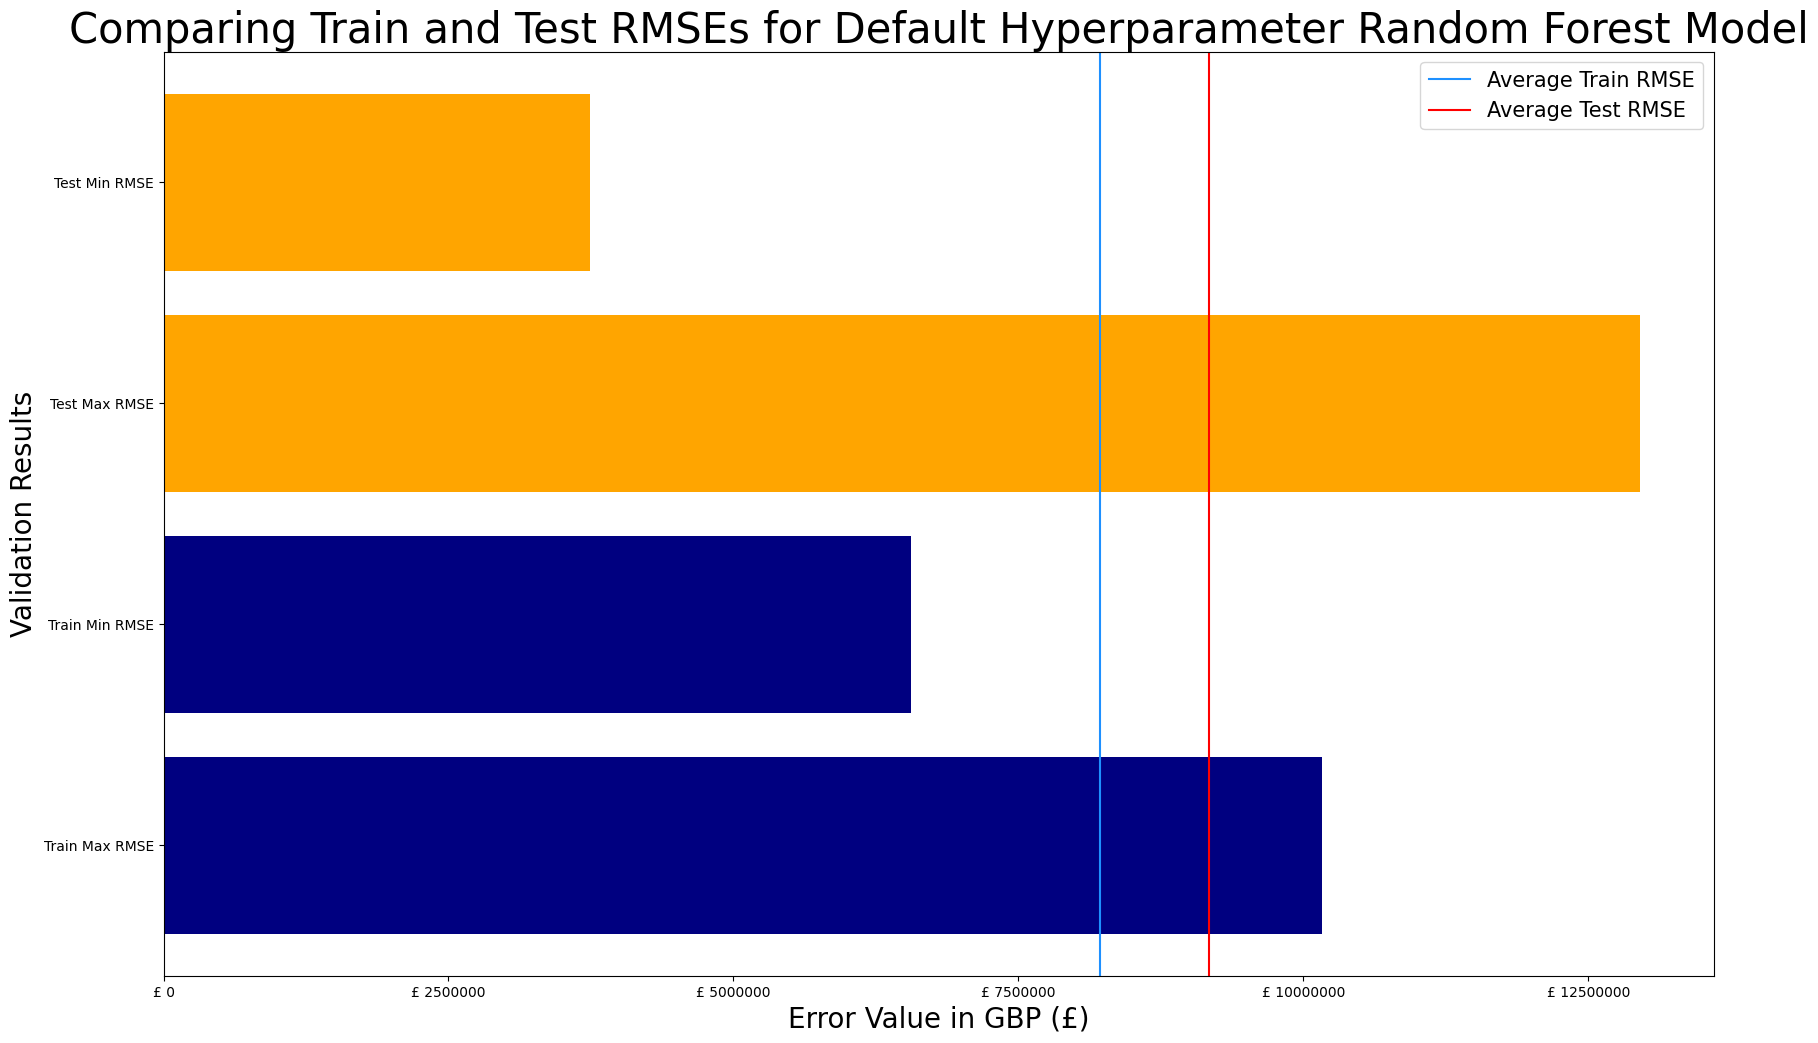

In [334]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [335]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,8212087.87,10160866.35,6555396.17
1,Test,9169992.48,12951791.14,3743426.25


In [336]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.01656314092045985
Test R-squared: -0.004205487597275459
Train Adjusted R-squared: -0.1033429212429382
Test Adjusted R-squared: -0.3131917914733602


In [337]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        Variable         VIF
0                            Age   40.706088
1                 Matches Played   37.618804
2                          Start   44.956387
3                          Goals    4.929973
4                        Assists    8.183322
5                 Penalties Made    1.708489
6           Shots From Freekicks    3.533285
7               Passes Completed  719.981702
8                         Passes  986.880560
9              Pass Completion %   54.128758
10        Total Passing Distance  273.860701
11  Progressive Passing Distance   76.310851
12         Shot-Creating Actions         inf
13      Shot-Creating Actions/90   32.795987
14                 SCA Pass Live         inf
15                 SCA Pass Dead         inf
16                  SCA Take-ons         inf
17                     SCA Shots         inf
18                     SCA Fouls         inf
19                   SCA Defense         inf
20         Goal-Creating Actions         inf
21      Go

/Users/tony/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [338]:
X = X.drop(['Matches Played', 'Start','Passes','Penalties Made','Passes Completed', 'Shot-Creating Actions', 'Goal-Creating Actions', 'SCA Pass Live', 'SCA Pass Dead', 'SCA Take-ons',
'SCA Shots', 'SCA Fouls', 'SCA Defense','Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Goal Pass Live',
'Goal Defense'], axis=1)

In [339]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                       Variable        VIF
0                           Age  34.877203
1                         Goals   2.869270
2                       Assists   3.966541
3          Shots From Freekicks   2.019700
4             Pass Completion %  42.494046
5        Total Passing Distance  65.183000
6  Progressive Passing Distance  58.212830
7      Shot-Creating Actions/90  12.494700
8      Goal-Creating Actions/90   5.553421


In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

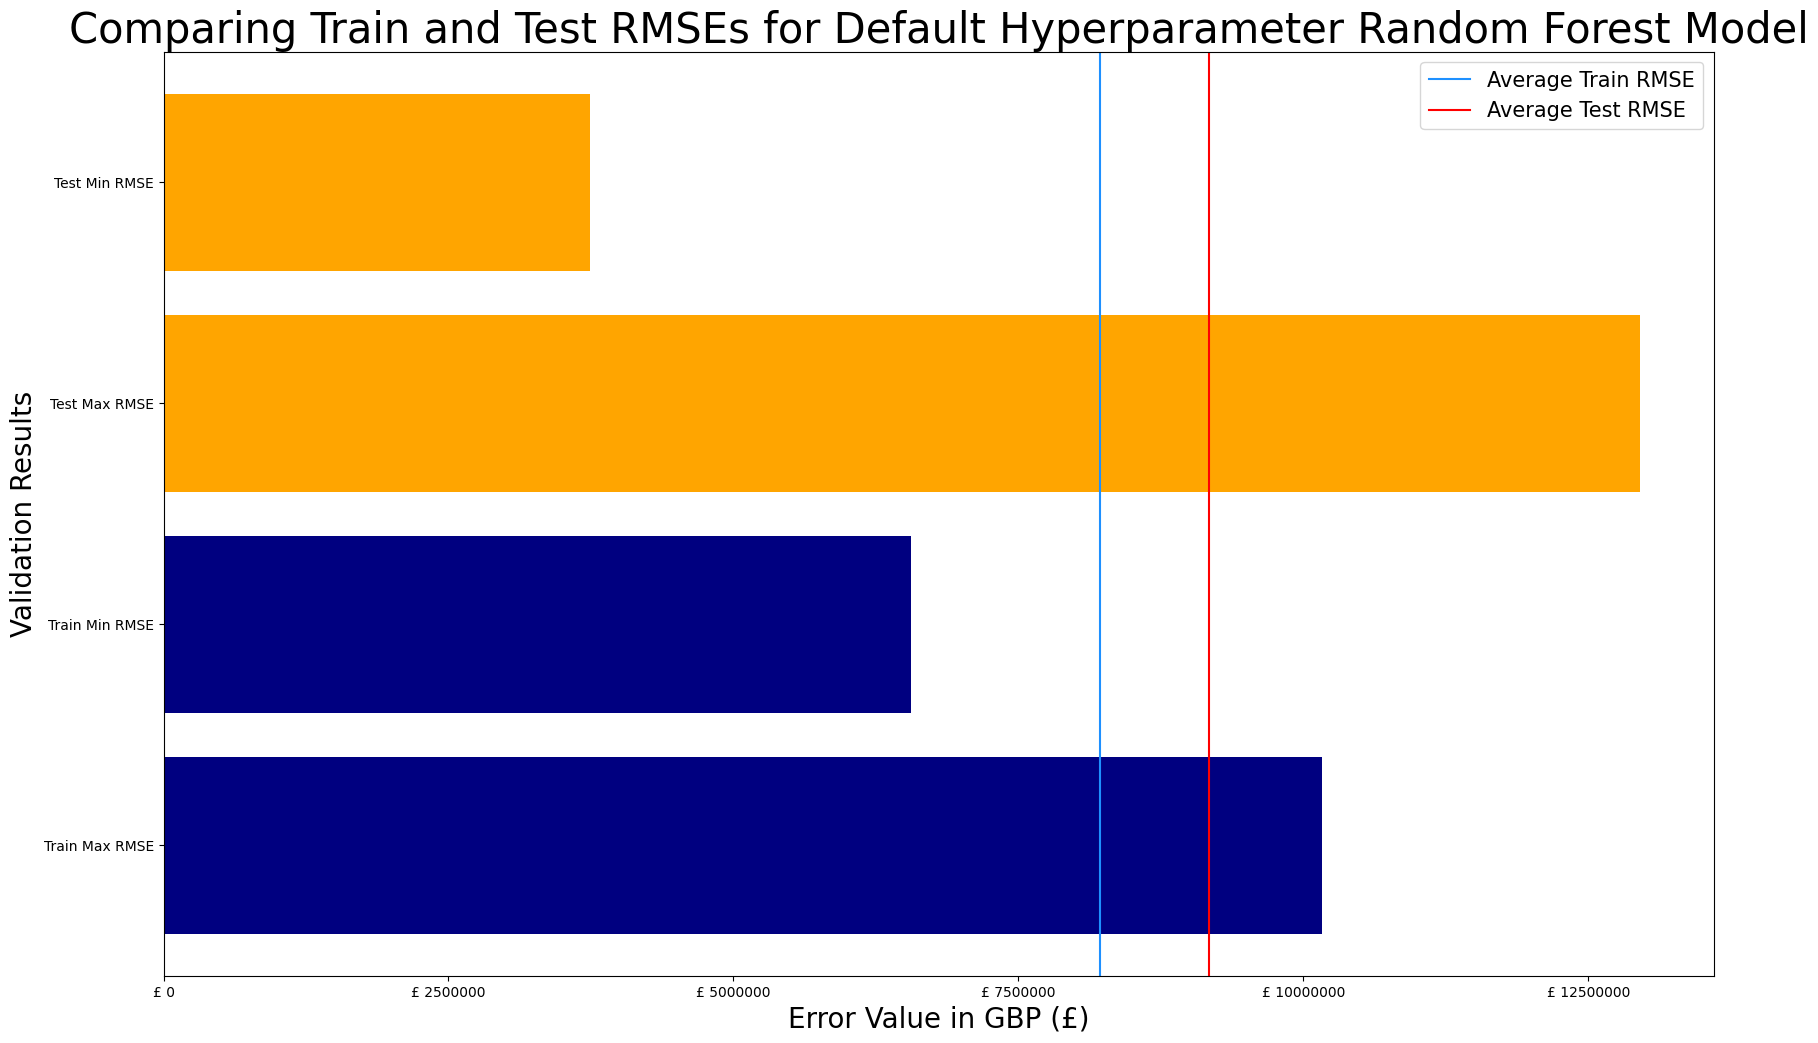

In [341]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [342]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,8212087.48,10160866.02,6555396.11
1,Test,9169992.26,12951790.90,3743425.96


In [343]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.01656300583610526
Test R-squared: -0.0042053890794973015
Train Adjusted R-squared: -0.04292919330735878
Test Adjusted R-squared: -0.08636764818600162


# Tuning

In [344]:
parameters = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_search = GridSearchCV(estimator = svr, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1,

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [345]:
grid_search.best_params_

{'C': 1000, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [346]:
param_values = list((grid_search.best_params_).values())
param_values

[1000, 3, 1, 'poly']

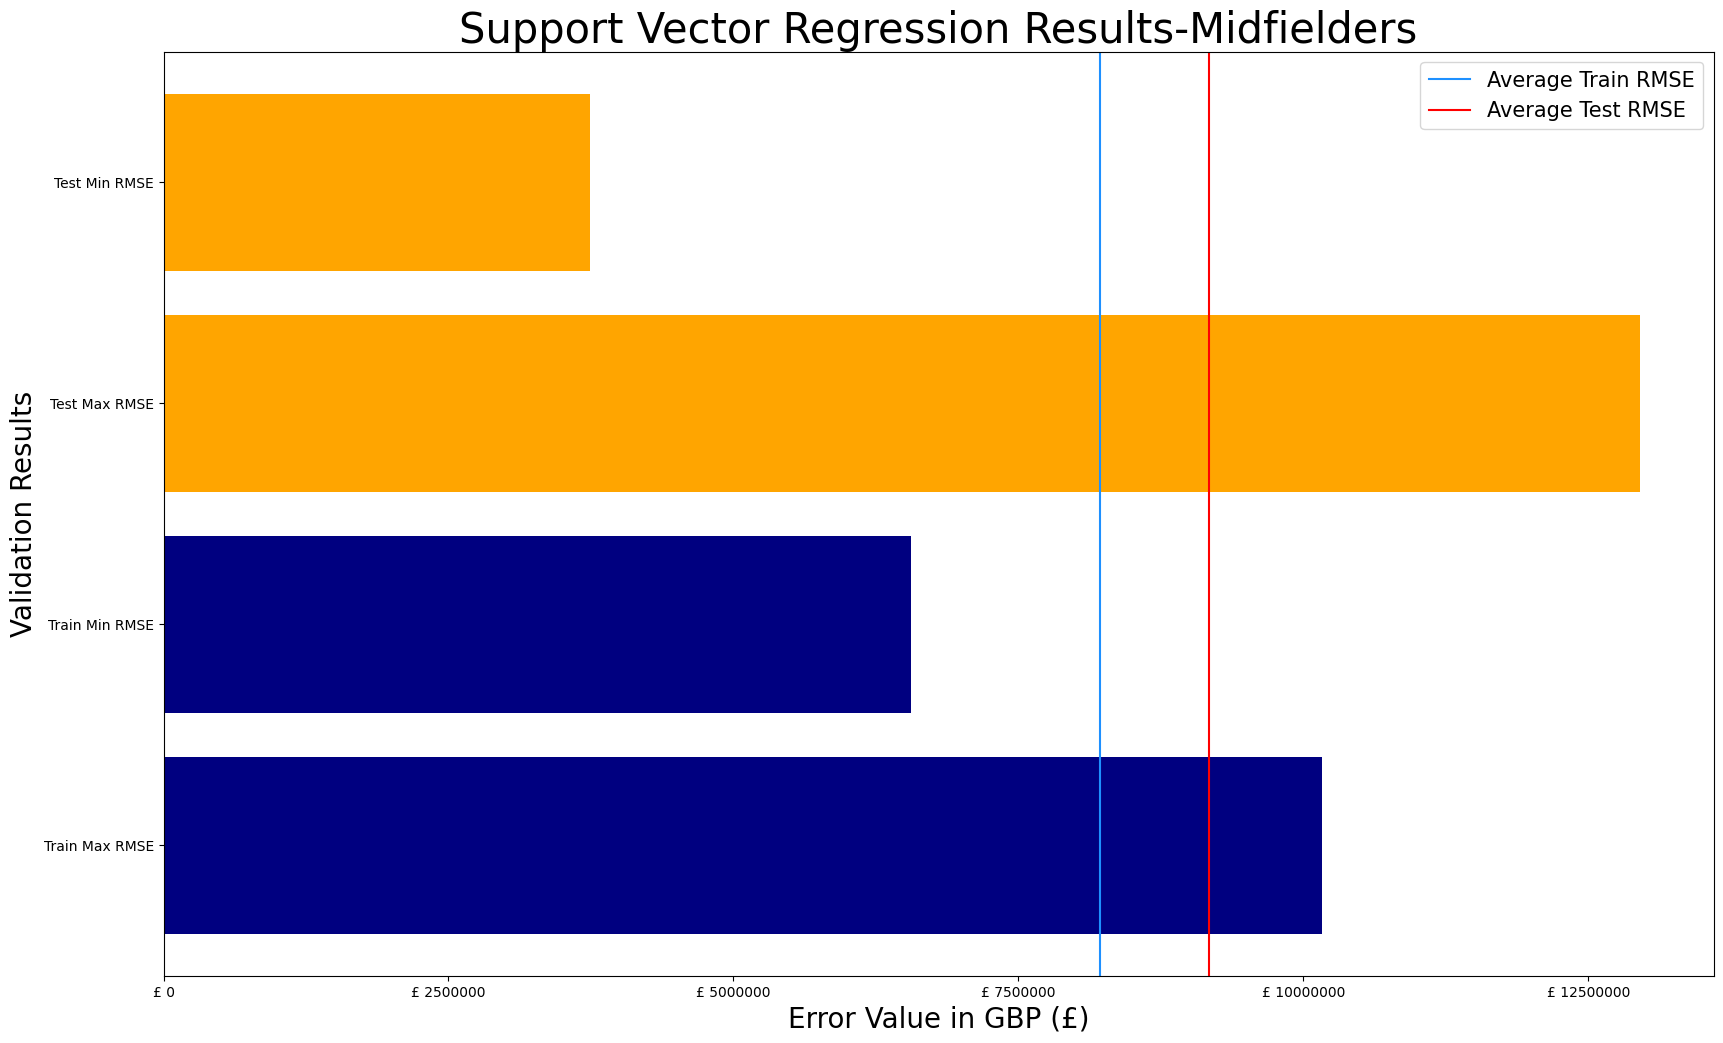

In [347]:
svr_Grid = SVR(C = param_values[0],
              degree = param_values[1],
              gamma = param_values[2],
              kernel=param_values[3])

svr_Grid.fit(X_train,y_train)

cross_val_train = cross_val_score(svr_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Support Vector Regression Results-Midfielders',fontsize=30)
ax.legend(fontsize=15)

In [348]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,7474799.73,9204070.11,6114903.07
1,Test,8952032.04,12462999.73,3890417.94


In [349]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr_Grid.predict(X_train)
y_test_pred = svr_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.22849153185360271
Test R-squared: 0.14687302169520866
Train Adjusted R-squared: 0.20848122576335038
Test Adjusted R-squared: 0.07707172347027125


# Defenders

In [350]:
defender = df[df['Position'] == 'Defender']
defender.head()

,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,Shots,...,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,League,Value
4,Alejandro Balde,18,33,30,1.0,6.0,0.0,4.0,0.0,19,...,25.0,12,54.0,17.0,1.0,FC Barcelona,Defender,Spain,La Liga,46000000.0
10,Josko Gvardiol,20,30,24,1.0,0.0,0.0,2.0,0.0,14,...,34.0,34,57.0,76.0,1.0,RB Leipzig,Defender,Croatia,Bundesliga,40000000.0
11,William Saliba,21,27,27,2.0,1.0,0.0,4.0,0.0,6,...,13.0,19,53.0,85.0,4.0,Arsenal FC,Defender,France,Premier League,35000000.0
21,Giorgio Scalvini,18,32,29,2.0,2.0,0.0,7.0,0.0,17,...,36.0,56,110.0,57.0,2.0,Atalanta BC,Defender,Italy,Serie A,30000000.0
28,Nuno Mendes,20,23,18,1.0,6.0,0.0,2.0,0.0,10,...,19.0,17,62.0,18.0,0.0,Paris Saint-Germain,Defender,Portugal,Ligue 1,25000000.0


In [351]:
defender.columns

Index(['Player', 'Age', 'Matches Played', 'Start', 'Goals', 'Assists',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'League', 'Value'],
      dtype='object')

In [352]:
X = defender.drop(['Player', 'Matches Played', 'Start', 'Goals',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Position',
       'Nation', 'Value', 'Club'
       ],axis=1)
y = defender['Value']

In [353]:
X.dtypes

Age                               int64
Assists                         float64
Progressive Passing Distance    float64
Goal Defense                    float64
Tackles                         float64
Tackles Won                       int64
Challenges                      float64
Successful Challenge %          float64
Blocks                          float64
Interceptions                     int64
Tackles + Interceptions         float64
Clearances                      float64
Errors                          float64
dtype: object

# Model Training

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

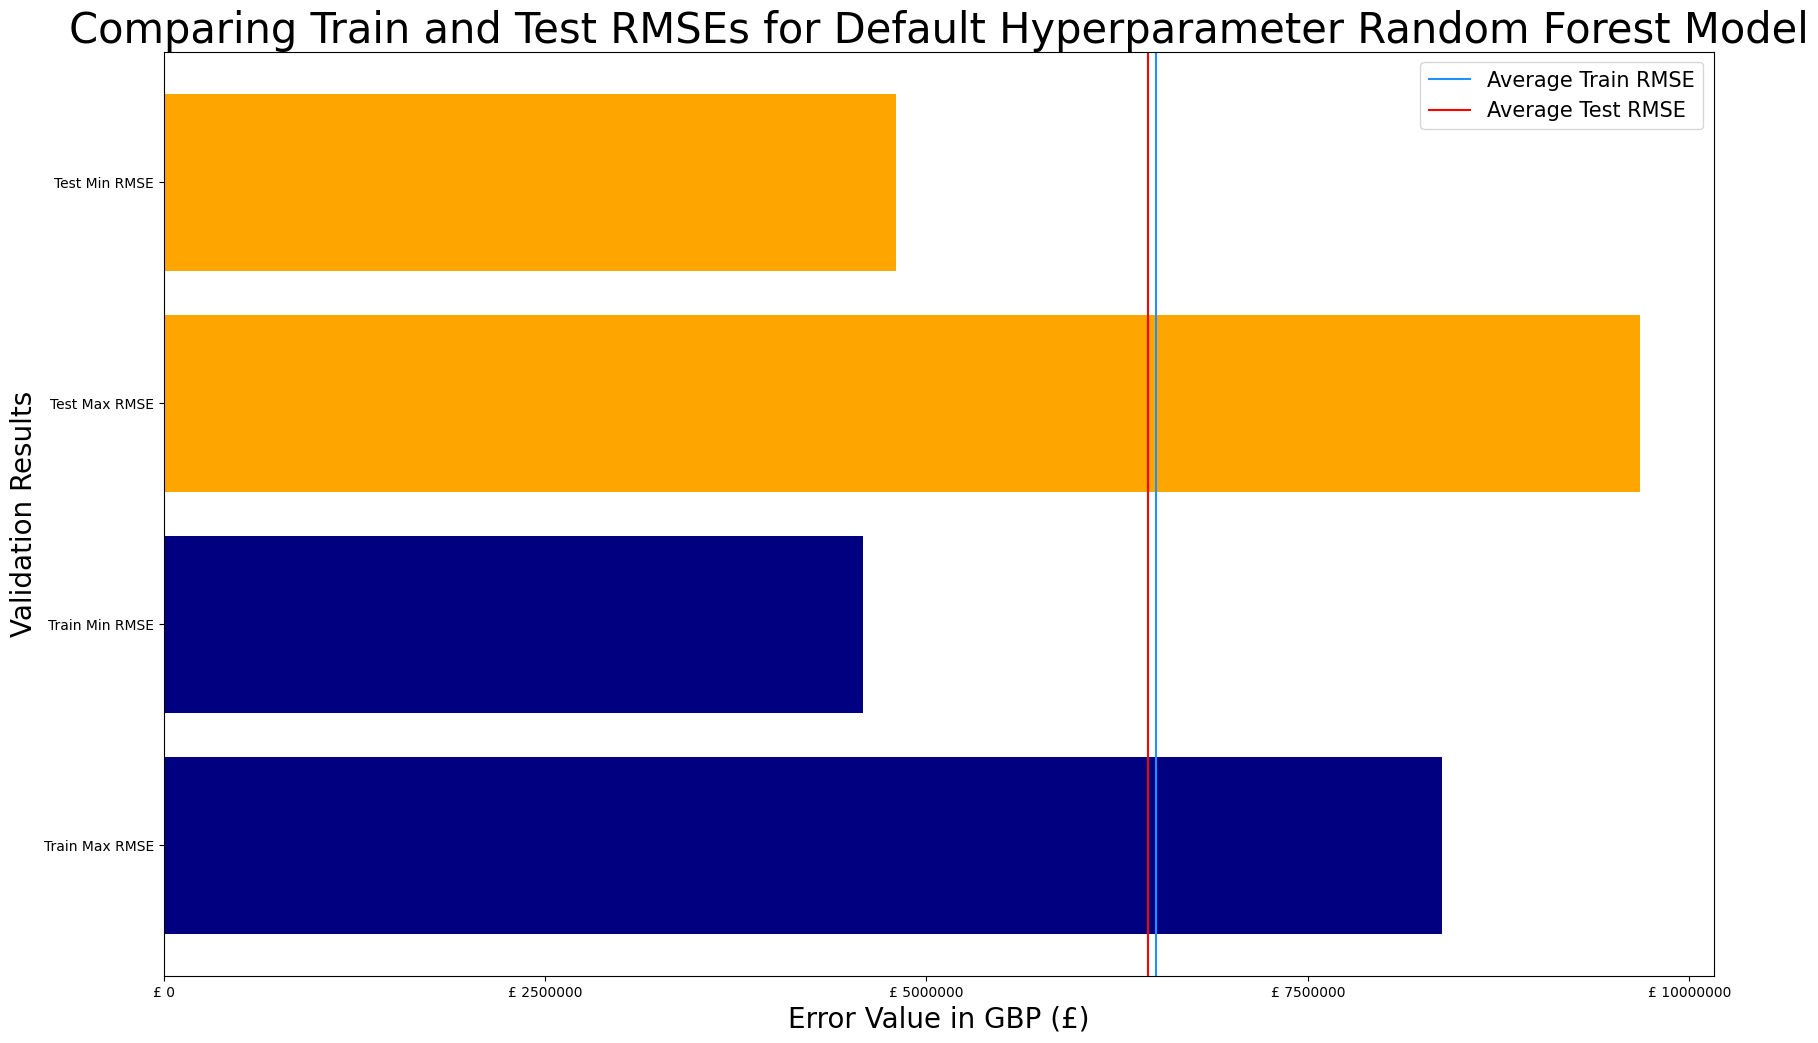

In [355]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [356]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6502045.04,8376533.32,4582329.89
1,Test,6453990.71,9674121.36,4797189.90


In [357]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.005086046252663401
Test R-squared: -0.002526111734644676
Train Adjusted R-squared: -0.0373480674904032
Test Adjusted R-squared: -0.10596134548504454


In [358]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        Variable        VIF
0                            Age  11.064725
1                        Assists   1.843203
2   Progressive Passing Distance  10.883389
3                   Goal Defense   1.072789
4                        Tackles        inf
5                    Tackles Won  68.258820
6                     Challenges  33.504556
7         Successful Challenge %  11.568720
8                         Blocks  15.610819
9                  Interceptions        inf
10       Tackles + Interceptions        inf
11                    Clearances  10.740537
12                        Errors   1.917522


/Users/tony/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [359]:
X = X.drop(['Tackles + Interceptions', 'Tackles Won', 'Challenges'], axis=1)

In [360]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                       Variable        VIF
0                           Age  10.991536
1                       Assists   1.835054
2  Progressive Passing Distance  10.867273
3                  Goal Defense   1.070341
4                       Tackles  10.639578
5        Successful Challenge %  11.395720
6                        Blocks  15.606501
7                 Interceptions  10.128658
8                    Clearances  10.573288
9                        Errors   1.914275


In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

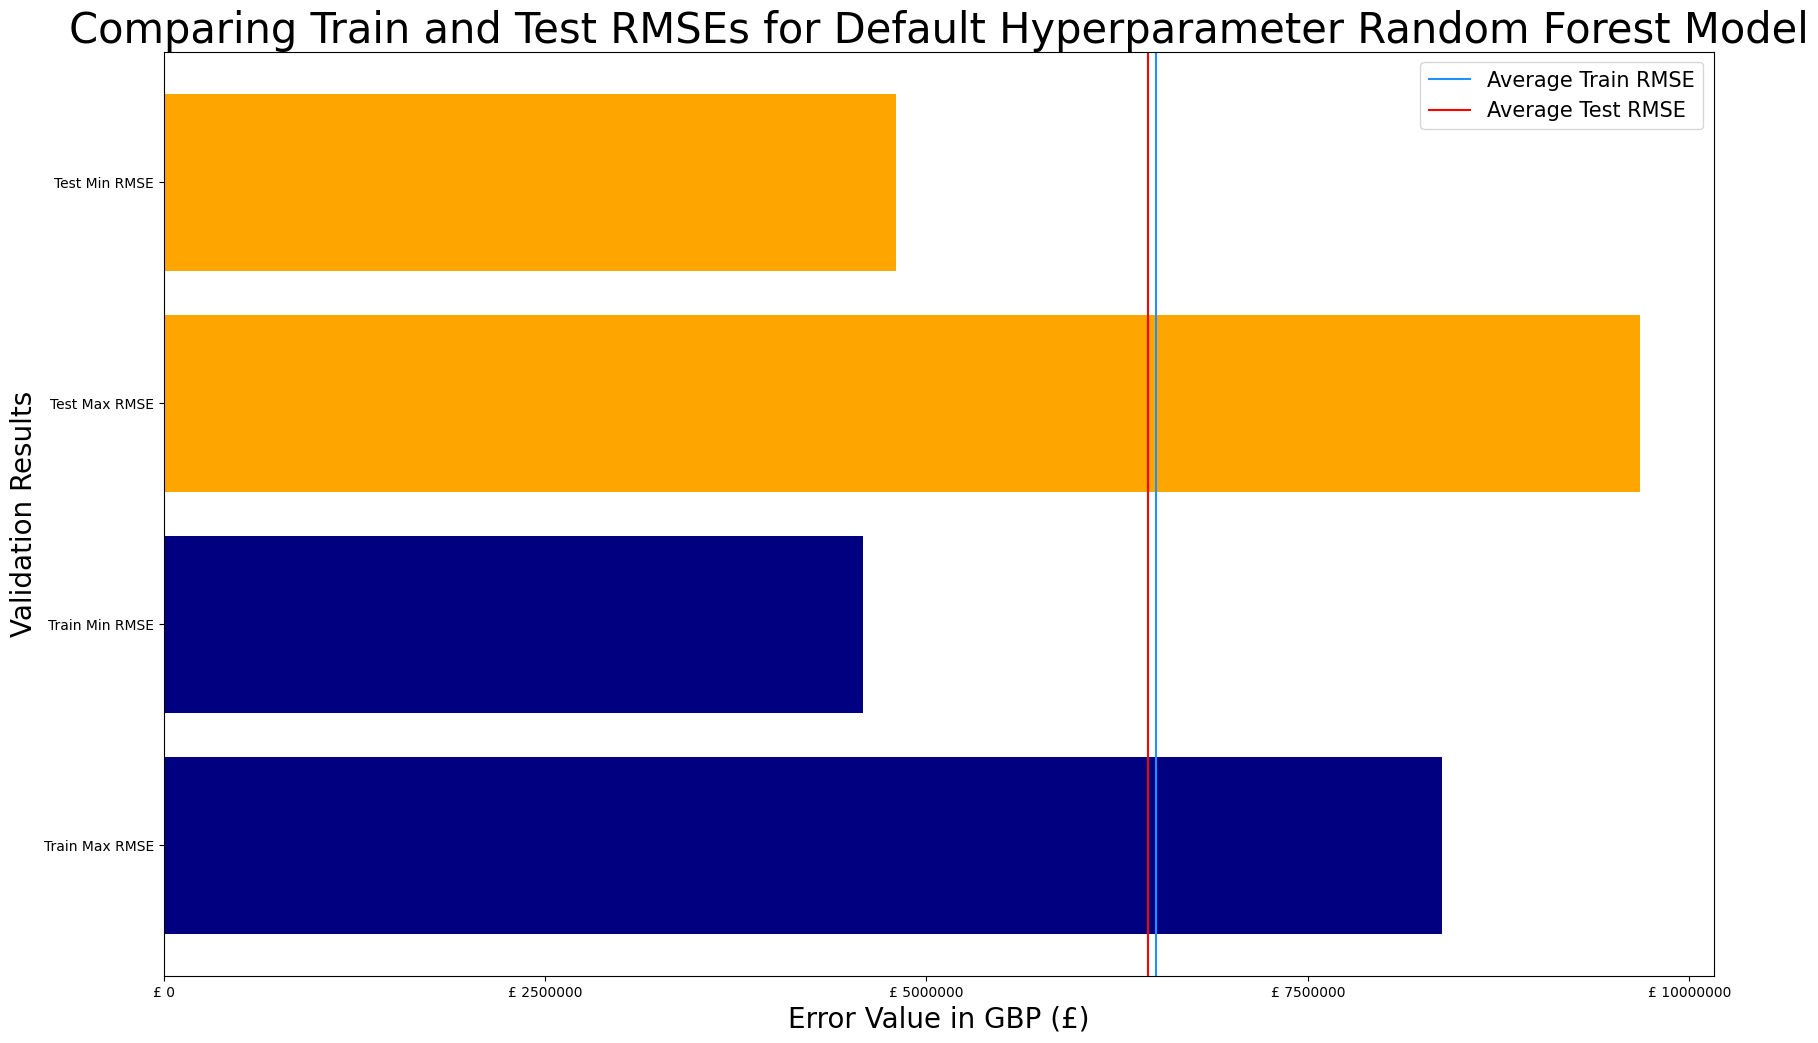

In [362]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [363]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6502044.59,8376532.19,4582329.64
1,Test,6453990.60,9674121.07,4797189.93


In [364]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.005085891900027839
Test R-squared: -0.0025259293043558007
Train Adjusted R-squared: -0.02972035003483242
Test Adjusted R-squared: -0.08024111762252284


# Tuning

In [365]:
parameters = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_search = GridSearchCV(estimator = svr, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1,

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [366]:
grid_search.best_params_

{'C': 1000, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [367]:
param_values = list((grid_search.best_params_).values())
param_values

[1000, 3, 1, 'poly']

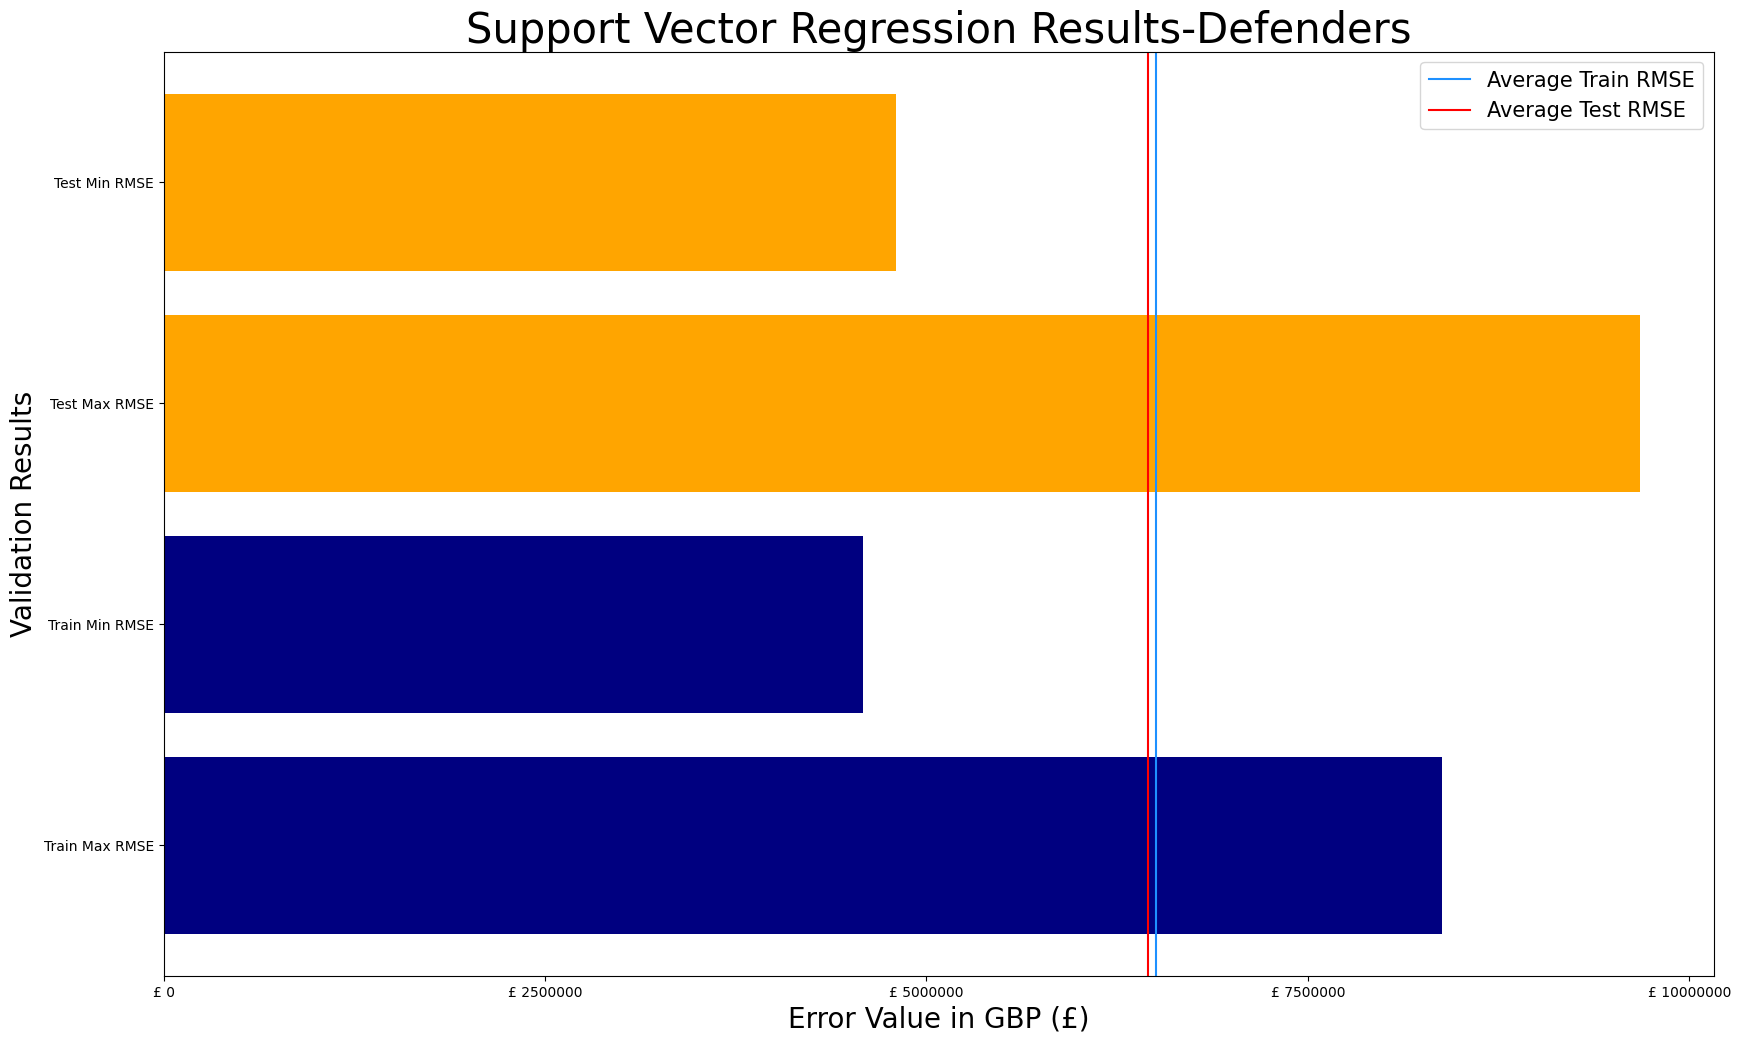

In [368]:
svr_Grid = SVR(C = param_values[0],
              degree = param_values[1],
              gamma = param_values[2],
              kernel=param_values[3])

svr_Grid.fit(X_train,y_train)

cross_val_train = cross_val_score(svr_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Support Vector Regression Results-Defenders',fontsize=30)
ax.legend(fontsize=15)

In [369]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6242348.27,8135375.81,4460188.92
1,Test,6233440.74,9384454.51,4467392.84


In [370]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr_Grid.predict(X_train)
y_test_pred = svr_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.13829210505619205
Test R-squared: 0.060291949562723435
Train Adjusted R-squared: 0.11717181351345174
Test Adjusted R-squared: -0.012553635742491798


# Graphing All RMSE Together

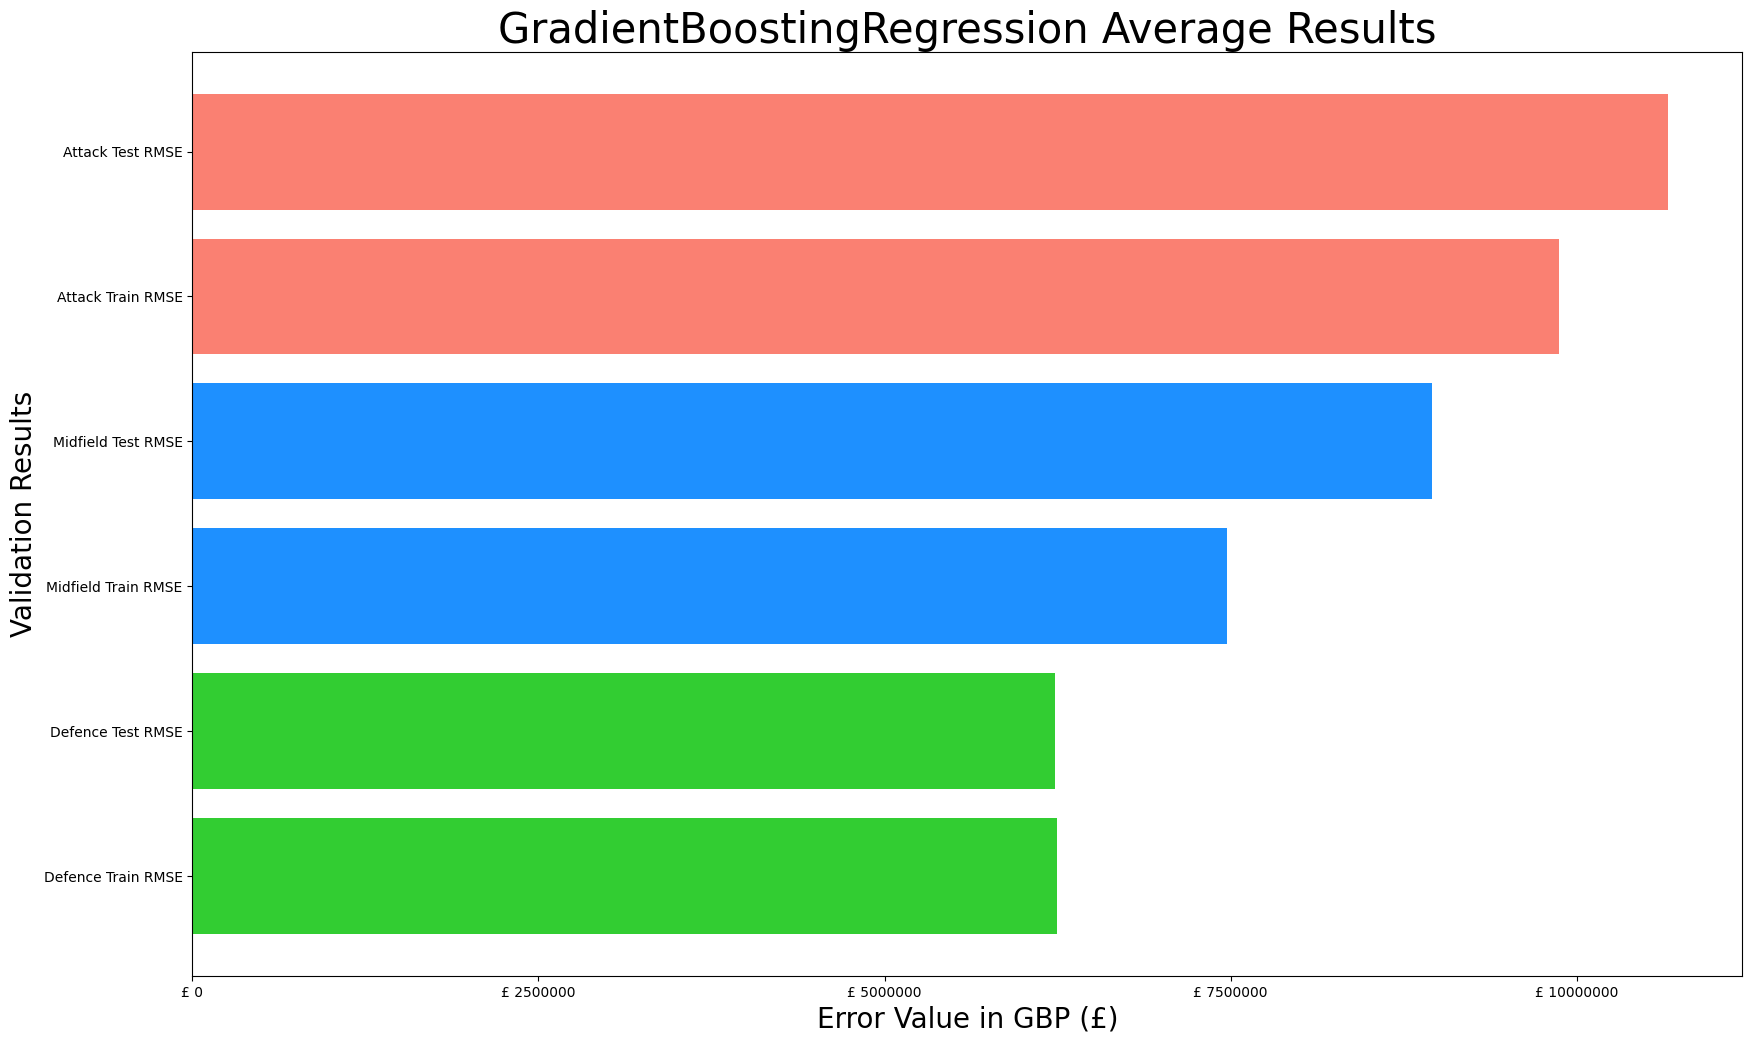

In [371]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,int(max([max(results_att['Avg RMSE']),max(results_mid['Avg RMSE']),max(results_def['Avg RMSE'])])+1000000),2500000))
y_ticks = [1,2,3,4,5,6]
y_ticks = [1,2,3,4,5,6]
y_labels = ['Defence Train RMSE','Defence Test RMSE',
            'Midfield Train RMSE','Midfield Test RMSE',
            'Attack Train RMSE','Attack Test RMSE',]

#Attack Results
att_train_pos = 5
att_train = results_att.iloc[0][1]
ax.barh(att_train_pos,att_train,color='salmon')

att_test_pos = 6
att_test = results_att.iloc[1][1]
ax.barh(att_test_pos,att_test,color='salmon')

#Midfield Results
mid_train_pos = 3
mid_train = results_mid.iloc[0][1]
ax.barh(mid_train_pos,mid_train,color='dodgerblue')

mid_test_pos = 4
mid_test = results_mid.iloc[1][1]
ax.barh(mid_test_pos,mid_test,color='dodgerblue')

#Defence Results
def_train_pos = 1
def_train = results_def.iloc[0][1]
ax.barh(def_train_pos,def_train,color='limegreen')

def_test_pos = 2
def_test = results_def.iloc[1][1]
ax.barh(def_test_pos,def_test,color='limegreen')

#Labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('GradientBoostingRegression Average Results',fontsize=30);